
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [ ]:
# Set your student number
student_number = '401106617'
Name = 'Alireza'
Last_Name = 'Mirrokni'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [2]:
!pip install tsp_solver2

In [1]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [2]:
class TSP:
  # TODO : cities, num cities, distances = ?

  def __init__(self, num_cities, cities = None):
    # TODO : if cities is None --> create randomly placed cities with respect to num_cities
    # TODO : else --> use the given data
    # note : city axis values can be from 0 to 1000
    if(cities is None):
      cities = np.array([[0, 0] for j in range(num_cities)])
      city_places = random.sample(range(10 ** 6), num_cities)

      for cnt in range(num_cities):
        place = int(city_places[cnt])
        x = place // 1000
        y = place % 1000
        cities[cnt][0], cities[cnt][1] = x, y

    self.cities = cities
    self.num_cities = num_cities

    distances = [[0.0 for j in range(num_cities)] for i in range(num_cities)]

    for i in range(num_cities):
      for j in range(num_cities):
        distances[i][j] = self.distance(i, j)

    self.distances = distances

  def distance(self, A, B):
    # TODO : return distance between city with index/number A and B in cities array
    dx = self.cities[A][0] - self.cities[B][0]
    dy = self.cities[A][1] - self.cities[B][1]
    return math.sqrt(dx ** 2 + dy ** 2)


  def tour_length(self, tour):
    # get the list of cities and return the tour length
    length = self.distance(tour[0], tour[-1])

    for cnt in range(1, len(tour)):
      length += self.distance(tour[cnt - 1], tour[cnt])

    return length


  def shortest_tour(self, tours):
    # TODO : get a list of toues and return : shortest_tour, shortest_length
    shortest_tour = tours[0]
    shortest_length = self.tour_length(tours[0])

    if(len(tours) > 1):
      for tour in tours[1:]:
        tour_length = self.tour_length(tour)
        if(tour_length < shortest_length):
          shortest_tour, shortest_length = tour, tour_length

    return shortest_tour, shortest_length


  def plot_tour(self, tour):
    # TODO : tour will be given an its expected to plot a good representation of the tour and cities
    x = []; y = []

    for city in tour:
        x += [self.cities[city][0]]
        y += [self.cities[city][1]]

    plt.plot(x, y, 'bo')
    a_scale = float(max(x))/float(1000)

    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='b', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'b', length_includes_head = True)

    plt.axis('off')
    plt.show()


  def nearest_neighbor(self, A, cities, count = None):
    # city "A" will be given and we expect
    # if count == None -->  get the nearest neighbor from the list "cities"
    # else --> we need "count" closest neighbors
    if(count is None):
      count = 1

    distances = {}

    for cnt in range(len(cities)):
      distances[cities[cnt]] = self.distance(A, cities[cnt])

    sorted_distances = dict(sorted(distances.items(), key=lambda x:x[1]))
    keys = list(sorted_distances.keys())
    return keys[:min(count, len(keys))]

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [5]:
def alltours_tsp(tsp):
    # TODO : generate all possible tours and return the shortest tour
    # note : don't create duplicate possible tours
    all_tours = list(itertools.permutations(range(1, tsp.num_cities)))
    all_tours = [list(tour) for tour in all_tours]

    for tour in all_tours:
        all_tours.remove(list(reversed(tour)))

    all_tours = [[0] + tour for tour in all_tours]
    return tsp.shortest_tour(all_tours)[0]


Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [ ]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : present the answer
tsp1 = TSP(5)
shortest_tour = alltours_tsp(tsp1)
print(shortest_tour)

[0, 2, 1, 3, 4]


Visualize your answer for the TSP problem

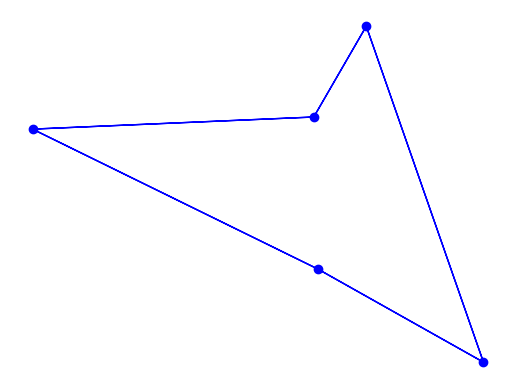

In [ ]:
# TODO : plot the answer using the TSP util methods
tsp1.plot_tour(shortest_tour)



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

[-3.7641227070379473, -3.0155267002160198, -0.6868202435605707, 3.085657627089049]


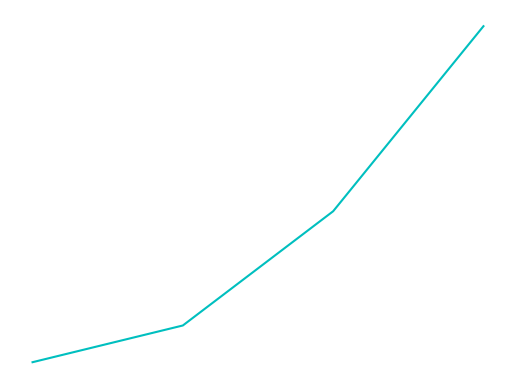

In [11]:
# TODO: create different countries
# TODO: run the algorithm and consider its run time
# TODO: plot the run times accordingly
# note : you can use log(time) for better visualisation
# note : given example is using log
execution_times = []

for num_cities in range(2, 6):
    start = time.time()
    new_tsp = TSP(2 * num_cities)
    alltours_tsp(new_tsp)
    end = time.time()

    execution_times += [np.log10(end - start)]

print(execution_times)
plt.plot(execution_times, color = 'c')
plt.axis('off')
plt.show()

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [3]:
def random_initial(tsp):
  # TODO : create a random tour and return tour, length
  random_tour = [0] + list(np.random.permutation(range(1, tsp.num_cities)))
  return random_tour, tsp.tour_length(random_tour)

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [4]:
def nearest_neighbor_initial(tsp):
  # TODO : create a nearest neighbor tour as above and return tour, length
  tour = []
  num_cities = tsp.num_cities
  unvisited_cities = [i for i in range(num_cities)]
  current_city = np.random.randint(0, num_cities)

  for i in range(num_cities):
    tour += [current_city]
    unvisited_cities.remove(current_city)
    if(len(unvisited_cities) == 0):
      continue
    current_city = tsp.nearest_neighbor(current_city, unvisited_cities)[0]

  return tour, tsp.tour_length(tour)

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [5]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
    # TODO : repeat nearest_neighbor_initial for better performance
    # note : if repetitions == None --> repetition = tsp.city_num
    if(repetitions is None):
        repetitions = tsp.num_cities

    starting_cities = random.sample(range(tsp.num_cities), repetitions)
    optimal_tour, optimal_tour_length = None, None

    for repitation in range(repetitions):
        new_tour = []
        num_cities = tsp.num_cities
        unvisited_cities = [i for i in range(num_cities)]
        current_city = starting_cities[repitation]

        for i in range(num_cities):
            new_tour += [current_city]
            unvisited_cities.remove(current_city)
            if(len(unvisited_cities) == 0):
                continue
            current_city = tsp.nearest_neighbor(current_city, unvisited_cities)[0]

        new_tour_length = tsp.tour_length(new_tour)
        if(repitation == 0 or new_tour_length < optimal_tour_length):
            optimal_tour, optimal_tour_length = new_tour, new_tour_length

    return optimal_tour, optimal_tour_length

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

In [18]:
# TODO: create different countries
# TODO: run the algorithm and consider its tour length
# TODO: plot/print the tour lengths accordingly
tsp2 =  TSP(30)
tour_lengths = []

for repitations in ([1, 4, 8, 12]):
    tour_lengths += [repeated_nearest_neighbor_initial(tsp2, repitations)[1]]

print(tour_lengths)

[5778.759888185599, 5535.027238889657, 5290.624793883035, 5268.985222871671]


Does repetition make our answer optimal? Not necessarily, because our initial states are being choosed randomly, but it increases the chance of finding better solutions.

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [19]:
def beam_search_initial(tsp, n, iter):
  # TODO : initial n starting points and name it as queue

  # TODO : in every iter : (iter range could not be less than tsp.city_num)
    # TODO : use the queue elements to create n new elements from each (new elements contain more cities)
    # TODO : filter these n^2 elements and just use n of them and name them as queue

  # TODO : return tour, length of the best option in queue
  if(iter < tsp.num_cities):
    return

  num_cities = tsp.num_cities
  queue = [[city] for city in random.sample(range(num_cities), n)]

  for iteration in range(iter - 1):
    temp_queue = []

    if(iteration < num_cities - 1):
      for semi_tour in queue:
        last_city = semi_tour[-1]
        candidate_cities = [city for city in range(num_cities) if city not in semi_tour]
        n_nearest_neighbors = tsp.nearest_neighbor(last_city, candidate_cities, n)
        temp_queue += [semi_tour + [candidate] for candidate in n_nearest_neighbors]
    else:
       for tour in queue:
          temp_queue += [tour]
          tour_copy = tour.copy()
          for cnt in range(n):
            i, j= random.sample(range(num_cities), 2)
            tour_copy[i], tour_copy[j] = tour_copy[j], tour_copy[i]
            temp_queue += [tour_copy]

    new_semi_tours = {}

    for cnt in range(len(temp_queue)):
      new_semi_tours[cnt] = tsp.tour_length(temp_queue[cnt]) - tsp.distance(temp_queue[cnt][0], temp_queue[cnt][-1])

    sorted_distances = dict(sorted(new_semi_tours.items(), key=lambda x:x[1]))
    keys = list(sorted_distances.keys())
    queue = [temp_queue[key] for key in keys[:min(n, len(temp_queue))]]

  return tsp.shortest_tour(queue)

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [112]:
# TODO: create a country
# TODO: run the needed algorithms and consider their tour length
# note : repeated_nearest_neighbor_initial(tsp, 10) and beam_search_initial(tsp, 5, 100) are used in
# the example below; you are free to use other parameters.
tsp3 = TSP(30)
random_initial_shortest_tour = random_initial(tsp3)
nearest_neighbor_initial_shortest_tour = nearest_neighbor_initial(tsp3)
repeated_nearest_neighbor_initial_shortest_tour = repeated_nearest_neighbor_initial(tsp3, 10)
beam_search_initial_shortest_tour = beam_search_initial(tsp3, 5, 100)
print("random_initial length :", random_initial_shortest_tour[1])
print("nearest_neighbor_initial length :", nearest_neighbor_initial_shortest_tour[1])
print("repeated_nearest_neighbor_initial length :", repeated_nearest_neighbor_initial_shortest_tour[1])
print("beam_search_initial length :", beam_search_initial_shortest_tour[1])

random_initial length : 16280.383285638492
nearest_neighbor_initial length : 5295.858106433642
repeated_nearest_neighbor_initial length : 5086.828872270225
beam_search_initial length : 5414.920384813198


Plot these tours and compare them visually.

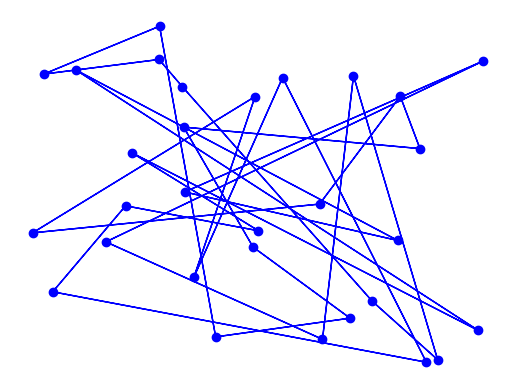

In [113]:
# TODO: plot the tours accordingly (random)
tsp3.plot_tour(random_initial_shortest_tour[0])

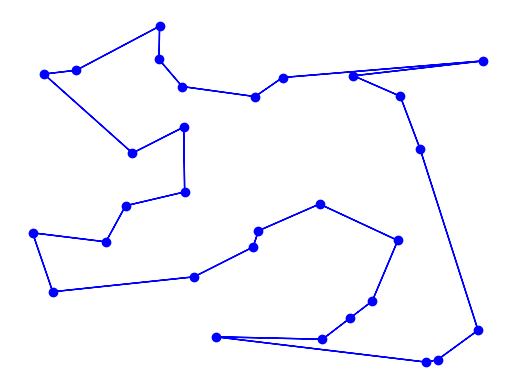

In [114]:
# TODO: plot the tours accordingly (nn)
tsp3.plot_tour(nearest_neighbor_initial_shortest_tour[0])

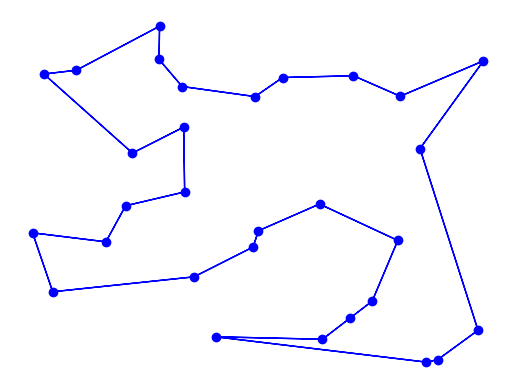

In [115]:
# TODO: plot the tours accordingly (rnn)
tsp3.plot_tour(repeated_nearest_neighbor_initial_shortest_tour[0])

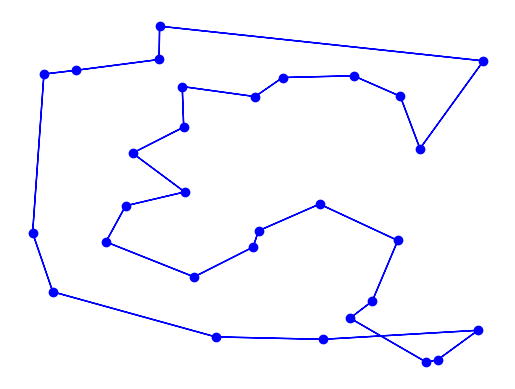

In [116]:
# TODO: plot the tours accordingly (beam)
tsp3.plot_tour(beam_search_initial_shortest_tour[0])

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [117]:
def lin_kernighan(tsp, initial, iterations=10):
    # TODO : init

    # TODO : for iteration :
      # TODO : for every distinct pair of (i, j):
        # TODO : If the reverse technique improves our tour, replace the reversed version with the actual version.
        # note : reverse technique : a1 a2 a3 a4 ... a10 ----with i = 2,  j = 5 ----> a1 a5 a4 a3 a2 a6 .... a10

    # TODO :  return tour, distance
    num_cities = tsp.num_cities

    tour = initial
    tour_length = tsp.tour_length(tour)

    for iter in range(iterations):
        for i in range(num_cities):
            for j in range(i+1, num_cities):
                new_tour = tour[:i].copy()
                new_tour += list(reversed(tour[i:j + 1].copy()))
                new_tour += tour[j + 1:].copy()
                new_tour_length = tsp.tour_length(new_tour)

                if(new_tour_length < tour_length):
                    tour, tour_length = new_tour, new_tour_length

    return tour, tour_length

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

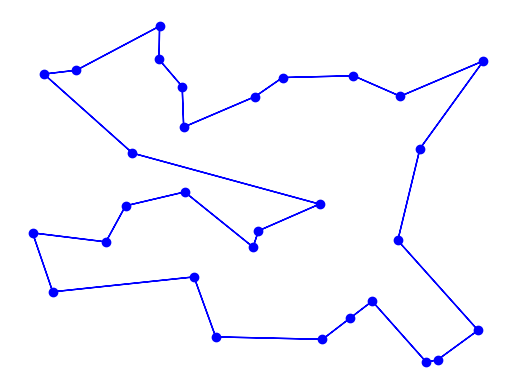

4994.89848814182


In [118]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : plot the answer
initial = [0] + list(np.random.permutation(range(1, tsp3.num_cities)))
lin_kernighan_shortest_tour = lin_kernighan(tsp3, initial)
tsp3.plot_tour(lin_kernighan_shortest_tour[0])
print(lin_kernighan_shortest_tour[1])

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [119]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.999, num_iterations=10000):
    # TODO : init

    # TODO : for iterantion:
      # TODO : get a neighbor
      # note : create neighbors using the reversing method,  but this time improvement is not important
      # TODO : with the acceptence probability, accept!
      # TODO : if it has a improvement, accept!
      # TODO : update tour if accepted
      # TODO : update temp

    # return tour, length
    tour = initial
    tour_length = tsp.tour_length(tour)
    optimal_tour, optimal_tour_length = tour, tour_length
    temperature = initial_temperature
    num_cities = tsp.num_cities

    for iter in range(num_iterations):
        i, j = random.sample(range(num_cities), 2)
        i, j = min(i, j), max(i, j)
        new_tour = tour[:i].copy()
        new_tour += list(reversed(tour[i:j + 1].copy()))
        new_tour += tour[j + 1:].copy()
        new_tour_length = tsp.tour_length(new_tour)

        delta_E = tour_length - new_tour_length

        if(delta_E >= 0):
            tour, tour_length = new_tour, new_tour_length
        else:
            prob = np.e ** (delta_E / temperature)
            if(np.random.rand() < prob):
                tour, tour_length = new_tour, new_tour_length

        if(tour_length < optimal_tour_length):
            optimal_tour, optimal_tour_length = tour, tour_length

        temperature *= cooling_rate

    return optimal_tour, optimal_tour_length


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

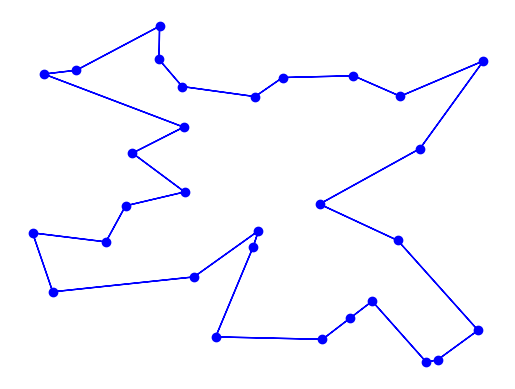

4868.098387526903


In [120]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : plot the answer
initial = [0] + list(np.random.permutation(range(1, tsp3.num_cities)))
simulated_annealing_shortest_tour = simulated_annealing(tsp3, initial)
tsp3.plot_tour(simulated_annealing_shortest_tour[0])
print(simulated_annealing_shortest_tour[1])

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

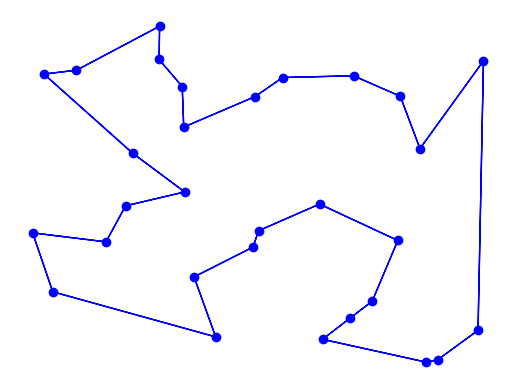

5074.115788063048


In [121]:
path = solve_tsp(tsp3.distances)
tsp3.plot_tour(path)
print(tsp3.tour_length(path))

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

In [123]:
# TODO: test different initial functions on your two algorithms using the same TSP problem
# TODO: also create an answer using the given library
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function
threshold = solve_tsp(tsp3.distances)
lkh_random = lin_kernighan(tsp3, random_initial(tsp3)[0])
lkh_nn = lin_kernighan(tsp3, nearest_neighbor_initial(tsp3)[0])
lkh_rnn = lin_kernighan(tsp3, repeated_nearest_neighbor_initial(tsp3)[0])
lkh_beam = lin_kernighan(tsp3, beam_search_initial(tsp3, 5, 100)[0])
simulated_random = simulated_annealing(tsp3, random_initial(tsp3)[0])
simulated_nn = simulated_annealing(tsp3, nearest_neighbor_initial(tsp3)[0])
simulated_rnn = simulated_annealing(tsp3, repeated_nearest_neighbor_initial(tsp3)[0])
simulated_beam = simulated_annealing(tsp3, beam_search_initial(tsp3, 5, 100)[0])
print("treshhold :", tsp3.tour_length(threshold))
print("lkh random :", lkh_random[1])
print("lkh nn :", lkh_nn[1])
print("lkh rnn :", lkh_rnn[1])
print("lkh beam :", lkh_beam[1])
print("simulated random :", simulated_random[1])
print("simulated nn :", simulated_nn[1])
print("simulated rnn :", simulated_rnn[1])
print("simulated beam :", simulated_beam[1])

treshhold : 5074.115788063048
lkh random : 4987.472877284374
lkh nn : 4945.724289289685
lkh rnn : 5068.510667743569
lkh beam : 4967.547879614864
simulated random : 4877.287436387915
simulated nn : 4868.098387526903
simulated rnn : 4995.036000838114
simulated beam : 4910.822922151086


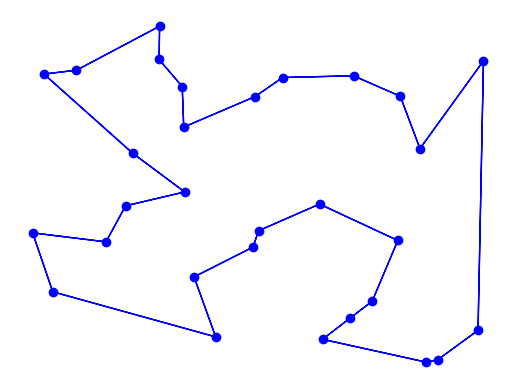

In [124]:
tsp3.plot_tour(threshold)

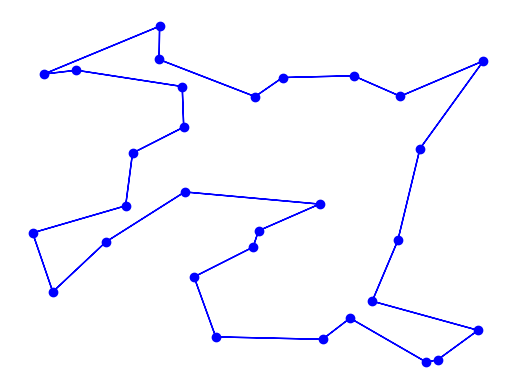

In [125]:
tsp3.plot_tour(lkh_random[0])

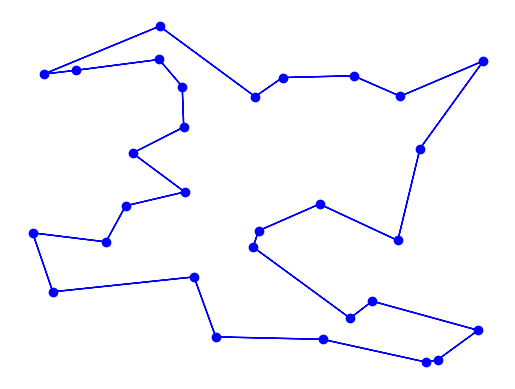

In [126]:
tsp3.plot_tour(lkh_nn[0])

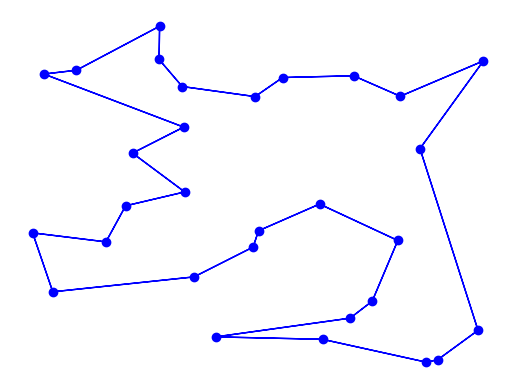

In [127]:
tsp3.plot_tour(lkh_rnn[0])

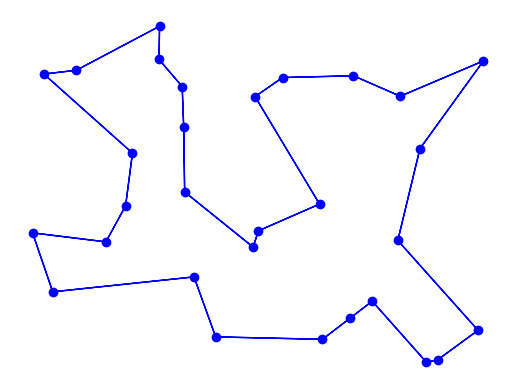

In [128]:
tsp3.plot_tour(lkh_beam[0])

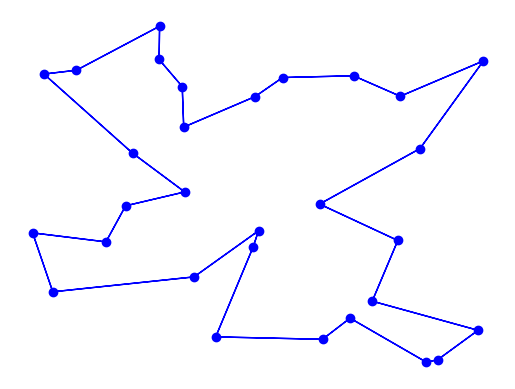

In [129]:
tsp3.plot_tour(simulated_random[0])

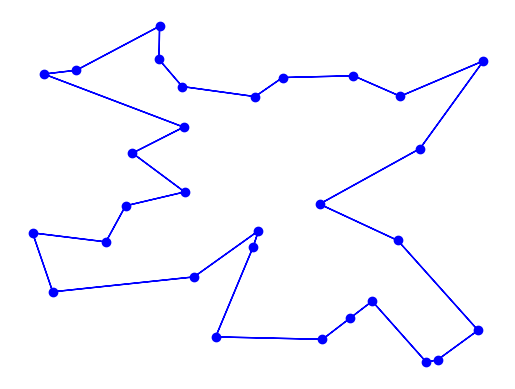

In [130]:
tsp3.plot_tour(simulated_nn[0])

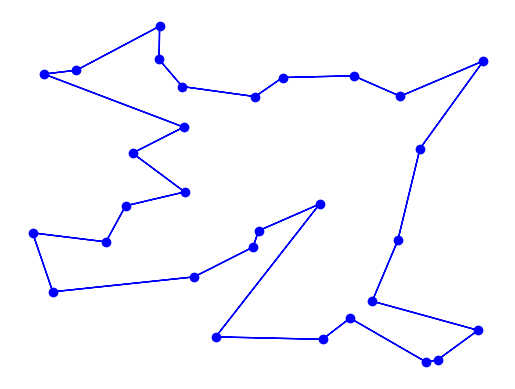

In [131]:
tsp3.plot_tour(simulated_rnn[0])

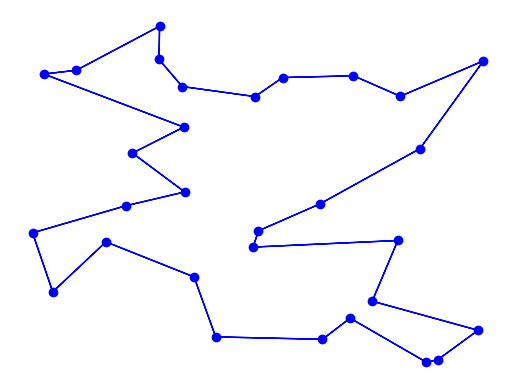

In [132]:
tsp3.plot_tour(simulated_beam[0])